Outline:

* [Introduction](#1)
* [Packages & Libraries](#3)
* [Basic EDA and Visualization](#4)
* [Data Preprocessing & Outlier Analysis, LOF](#5)
* [Model](#6)
    * [K-Nearest Neighbors (KNN) Algorithm](#7)
    * [KNN Best Parameters](#8)
* [Dimensionality Reduction](#9)
    * [Principal Component Analysis (PCA)](#10)
    * [Neighborhood Component Analysis (NCA)](#11)
* [Results & Evaluation](#12)

<a id = "1"></a>
### Introduction
<img src="https://www.jbcp.jo/sites/default/files/2018-05/Breast-Cancer-Staging.jpg">

**Background:** Breast cancer is a type of cancer that starts in the breast. It can start in one or both breasts. Breast cancer can spread when the cancer cells get into the blood or lymph system and then are carried to other parts of the body. The lymph (or lymphatic) system is a part of your body's immune system. It is a network of lymph nodes (small, bean-sized glands), ducts or vessels, and organs that work together to collect and carry clear lymph fluid through the body tissues to the blood. The clear lymph fluid inside the lymph vessels contains tissue by-products and waste material, as well as immune system cells.

Source: [https://www.cancer.org/cancer/breast-cancer/about/what-is-breast-cancer.html]

**Motivation:** Finding breast cancer early and getting state-of-the-art cancer treatment are two of the most important strategies for preventing deaths from breast cancer. Breast cancer that’s found early, when it’s small and has not spread, is easier to treat successfully. In this work we will apply a breast cancer classification with KNN algorithm. We will also analyze the outliers of the dataset before KNN training. To increase model accuracy dimension reduction techniques like PCA and NCA will be performed.

<a id = "2"></a>
### Packages & Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

**First look on data**

In [18]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [19]:
data = data.drop(['id','Unnamed: 32'], axis = 1)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
data.rename(columns = {'diagnosis':'target'}, inplace = True)
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


<AxesSubplot:xlabel='target', ylabel='count'>

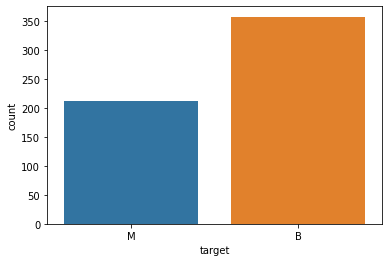

In [21]:
sns.countplot(data['target'])

In [23]:
print(data.target.value_counts())

B    357
M    212
Name: target, dtype: int64


In [24]:
data['target'] = [1 if i.strip() == 'M' else 0 for i in data['target']]

In [25]:
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [26]:
data.shape

(569, 31)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

There is no missing value in dataset

In [28]:
data.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Note: To get data features into the same space, we have to scale all features

<a id = "3"></a>
### Basic EDA & Visualization

In [30]:
# Correlations
corr_matrix = data.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


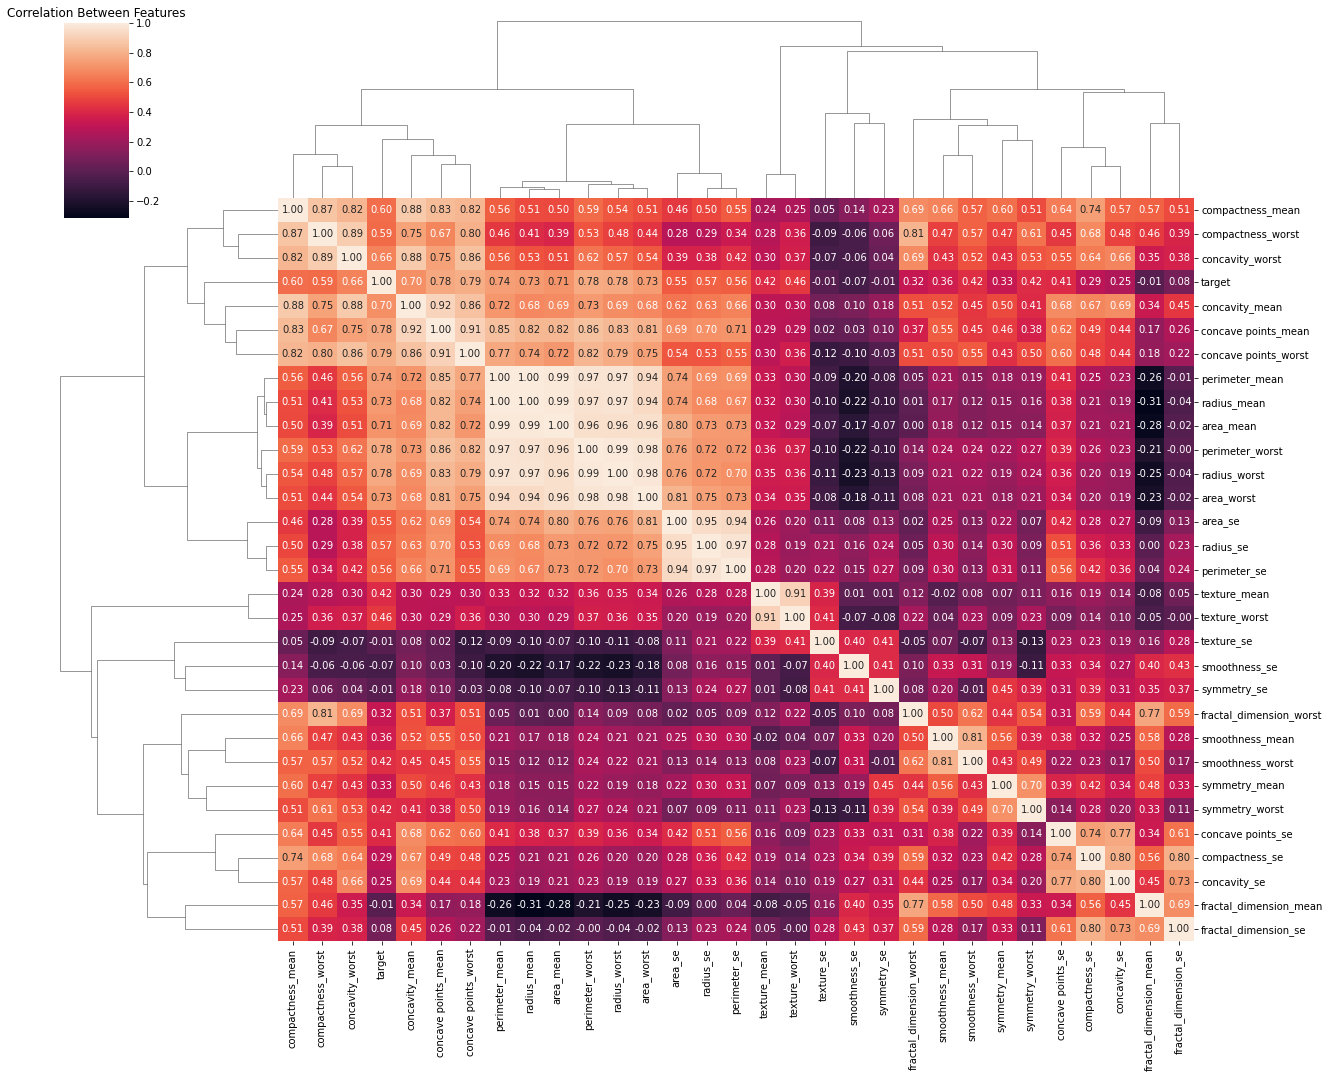

In [51]:
# Clustermap with Pearson Correlation Coefficients
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize = (18, 15))
plt.title("Correlation Between Features")
plt.show()

In [56]:
# threshold to explore highly correlated features
threshold = 0.75
filter_ = np.abs(corr_matrix['target']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
corr_features

['target',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

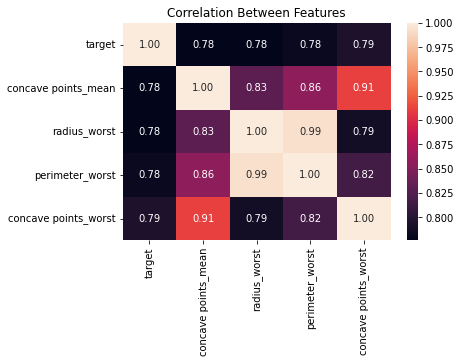

In [57]:
# visualize which features are highly correlated
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

There are some correlated features

In [64]:
# melting data for box plot
data_melted = pd.melt(data, id_vars = 'target', var_name = 'feature', value_name = 'value')
data_melted

,target,feature,value
0,1,radius_mean,17.99000
1,1,radius_mean,20.57000
2,1,radius_mean,19.69000
3,1,radius_mean,11.42000
4,1,radius_mean,20.29000
...,...,...,...
17065,1,fractal_dimension_worst,0.07115
17066,1,fractal_dimension_worst,0.06637
17067,1,fractal_dimension_worst,0.07820
17068,1,fractal_dimension_worst,0.12400


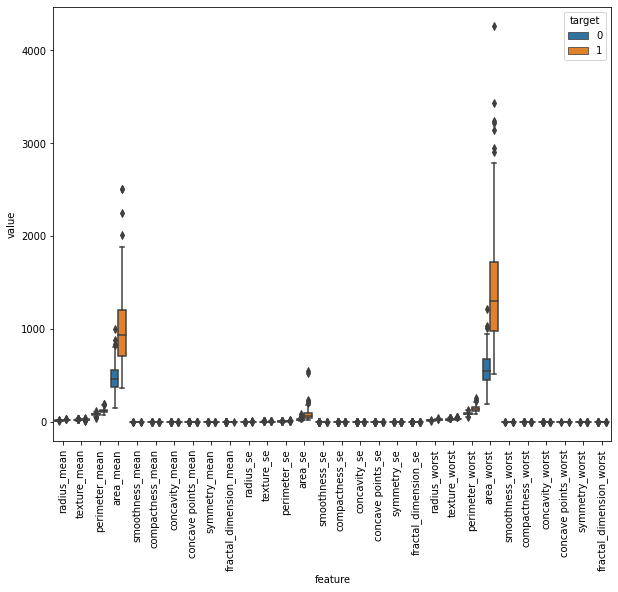

In [67]:
# Box plot to detect outliers
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'feature', y = 'value', hue = 'target', data = data_melted)
plt.xticks(rotation = 90)
plt.show()

As seen, box plots is a little bit confusing because non-scaled features. We have to normalize the features to solve this issue.

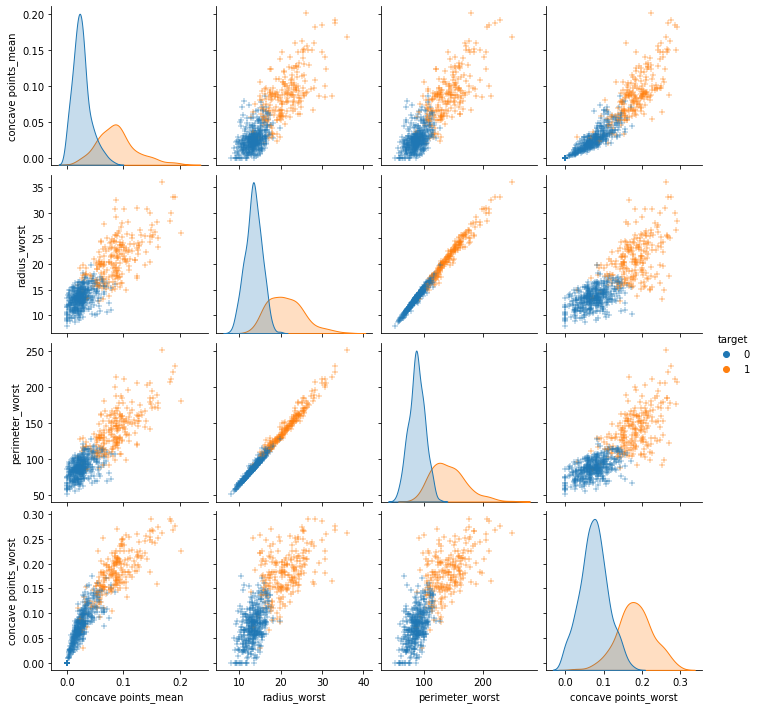

In [73]:
# decreasing threshold to see if the distributions have skewness
threshold = 0.75
filter_ = np.abs(corr_matrix['target']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
sns.pairplot(data[corr_features], diag_kind = 'kde', markers = "+", hue = 'target')
plt.show()

<img src="https://studiousguy.com/wp-content/uploads/2021/08/Skewed-Distribution.jpg" width="500" height="600">

Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. 

* A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1.
* A negative skewness value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.
* A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.

So which features have skewness?

In [113]:
skewness = pd.DataFrame(data.skew(), columns = ['skewness'])
skewness

,skewness
target,0.528461
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609


In [114]:
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
target,Normal Distribution
radius_mean,Normal Distribution
texture_mean,Normal Distribution
perimeter_mean,Normal Distribution
area_mean,Positively skewed
smoothness_mean,Normal Distribution
compactness_mean,Positively skewed
concavity_mean,Positively skewed
concave points_mean,Positively skewed
symmetry_mean,Normal Distribution


There are many skewed features on data. We must solve this issue too.

<a id = "4"></a>
### Data Preprocessing & Outlier Analysis

**Density based Outlier Detection: Local Outlier Factor (LOF)** : Compare local density of one point to local density of its K-NN
* LOF > 1 ==> outlier / anomaly
* LOF < 1 ==> inlier

<img src="https://www.veribilimiokulu.com/wp-content/uploads/2020/03/LOF_wikipwdia.jpg" width="500" height="600">

In [166]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

In [120]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score

array([-1.42244008, -1.06678249, -0.97894764, -1.59693295, -1.06993589,
       -1.773071  , -1.01568723, -1.25174625, -1.38051485, -1.64435685,
       -0.99760184, -1.06178607, -1.12949091, -1.25844429, -0.96863713,
       -1.09335084, -1.13938097, -1.06049329, -1.41067136, -0.97224755,
       -0.98172267, -1.01796076, -1.00120872, -1.55647306, -1.76479918,
       -1.14444971, -1.18253923, -1.05669361, -1.1171278 , -0.96612603,
       -0.98190689, -1.99760079, -1.00701649, -1.00581116, -1.01466535,
       -0.98769018, -0.98362673, -1.39411328, -2.2334333 , -1.09045555,
       -1.14776543, -1.31502499, -0.98035055, -1.4174209 , -1.28342864,
       -0.98156833, -1.32235455, -1.32568003, -1.09322188, -0.97065701,
       -0.97278561, -1.05918996, -0.97370459, -1.02944   , -1.03748568,
       -1.00072293, -1.24017071, -1.05450437, -0.99159205, -1.09401411,
       -0.98594633, -1.09659782, -1.08187925, -1.00799336, -1.59848383,
       -1.05245105, -1.02666387, -0.97040029, -1.01252311, -1.06

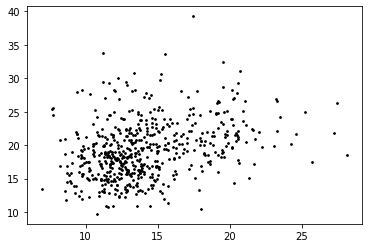

In [163]:
plt.figure()
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point') # radius_mean and texture_mean as an example plot
plt.show()

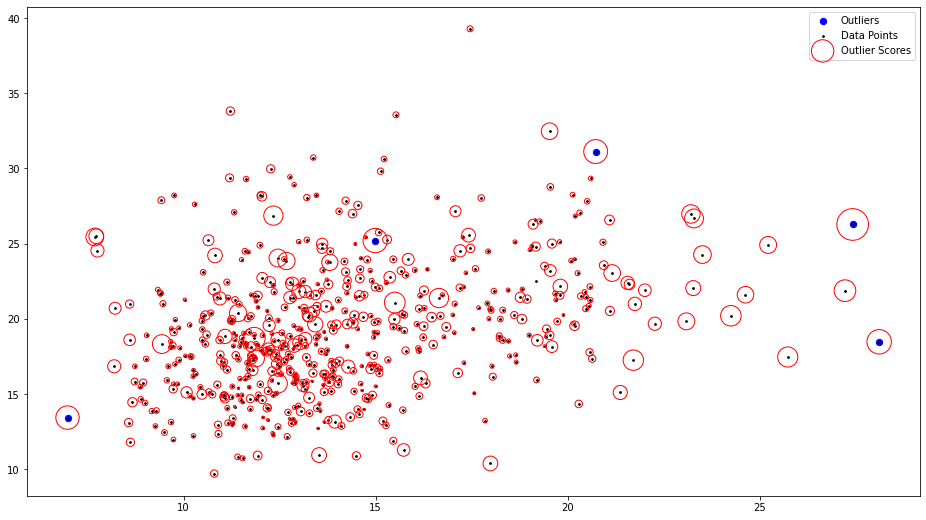

In [162]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  # Normalization
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [167]:
# Drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

## To be continued